**Data Mining - Sheet02**


In [ ]:
import random          
import matplotlib.pyplot as plt

**Exercise 1** 

>Implement a simple simulation of these rumor spreading processes.

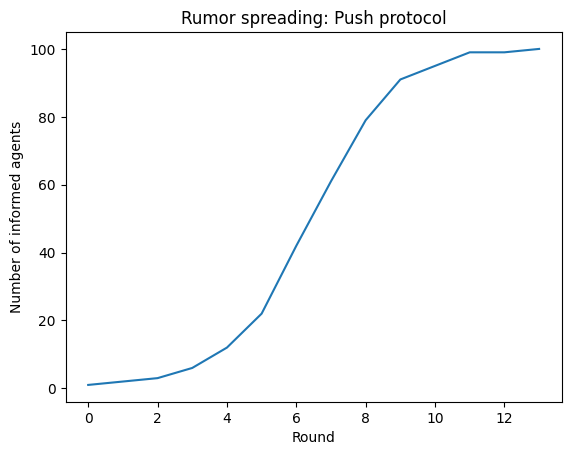

In [37]:
size = int(input("Choose the size of the simulation: "))

# PUSH

def rumor_spreading_push(size):
    agent = [False] * size  # We create a list of all uninformed agents
    agent[0] = True  # We make the first agent informed
    informed_counts = [1]  
    rounds = 0

    while sum(agent) < size:  # We make sure every agent ends up informed
        new_agent = agent.copy()
        for i in range(size):
            target = random.randint(0, size - 1)  # We randomly find our target agent
            
            if agent[i]:  # We make sure the agent is informed
                new_agent[target] = True  # The target agent becomes informed
        
        agent = new_agent
        rounds += 1
        informed_counts.append(sum(agent))

    plt.plot(range(rounds + 1), informed_counts)  # We plot the results
    plt.xlabel("Round")
    plt.ylabel("Number of informed agents")
    plt.title("Rumor spreading: Push protocol")
    plt.show()

rumor_spreading_push(size)

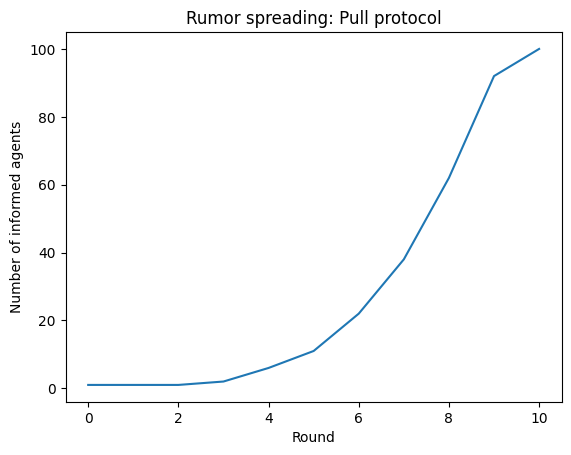

In [38]:
# PULL

size = int(input("Choose the size of the simulation: "))

def rumor_spreading_pull(size):
    agent = [False] * size  
    agent[0] = True  
    informed_counts = [1]  
    rounds = 0

    while sum(agent) < size:  
        new_agent = agent.copy()
        for i in range(size):
            target = random.randint(0, size - 1)  
            
            if not agent[i] and agent[target]:  # We make sure the agent is NOT informed and the target is
                new_agent[i] = True  # The agent who calls becomes informed
        
        agent = new_agent
        rounds += 1
        informed_counts.append(sum(agent))

    plt.plot(range(rounds + 1), informed_counts)  
    plt.xlabel("Round")
    plt.ylabel("Number of informed agents")
    plt.title("Rumor spreading: Pull protocol")
    plt.show()

rumor_spreading_pull(size)


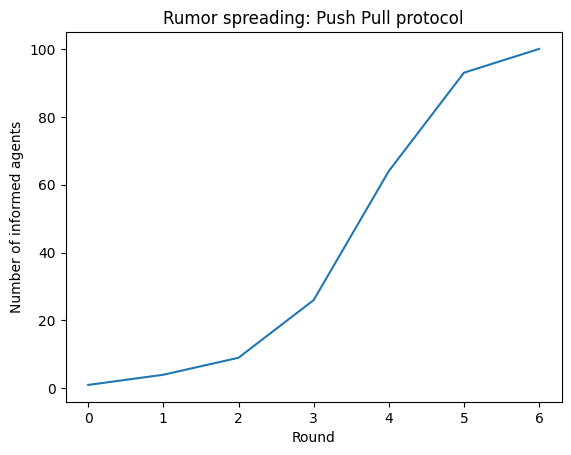

In [39]:
# PUSHPULL

size = int(input("Choose the size of the simulation: "))

def rumor_spreading_pushpull(size):
    agent = [False] * size  
    agent[0] = True  
    informed_counts = [1]  
    rounds = 0

    while sum(agent) < size:  
        new_agent = agent.copy()
        for i in range(size):
            target = random.randint(0, size - 1)

            if agent[i] and not agent[target]:  # Push function
                new_agent[target] = True
            
            if not agent[i] and agent[target]:  # Pull function 
                new_agent[i] = True  
        
        agent = new_agent
        rounds += 1
        informed_counts.append(sum(agent))

    plt.plot(range(rounds + 1), informed_counts)  
    plt.xlabel("Round")
    plt.ylabel("Number of informed agents")
    plt.title("Rumor spreading: Push Pull protocol")
    plt.show()

rumor_spreading_pushpull(size)

**Exercise 2**

>Run a simulation campaign for push, pull, and pushpull. Identify interesting properties of the process and generate empirical data for varying numbers of agents n.
>
>• Hint: Simple rumor spreading processes are used, e.g., by Amazon to synchronize replicated data stores. What might be interesting to them?
>
>• Hint: Think a moment about meaningful values of n to simulate. You are not restricted
to a linear scale.
>
>• Hint: It would be interesting to see data for varying numbers of n as well as for the behavior of the process for one specific number of agents n. Can you simulate $10^9$ agents in a reasonable amount of time?

We put together the logic of the functions in just one function:

In [ ]:
import random
import matplotlib.pyplot as plt
import time
import numpy as np

def simulate(protocol, size):
    agent = [False] * size
    agent[0] = True
    informed_counts = [1]
    rounds = 0

    start_time = time.time() # variable to keep track of simulation duration

    while sum(agent) < size:
        new_agent = agent.copy()
        for i in range(size):
            target = random.randint(0, size - 1)

            if protocol in ["push", "pushpull"] and agent[i] and not agent[target]: # push logic
                new_agent[target] = True
            if protocol in ["pull", "pushpull"] and not agent[i] and agent[target]: # pull logic
                new_agent[i] = True

        agent = new_agent
        rounds += 1
        informed_counts.append(sum(agent))

    elapsed = time.time() - start_time
    return informed_counts, rounds, elapsed


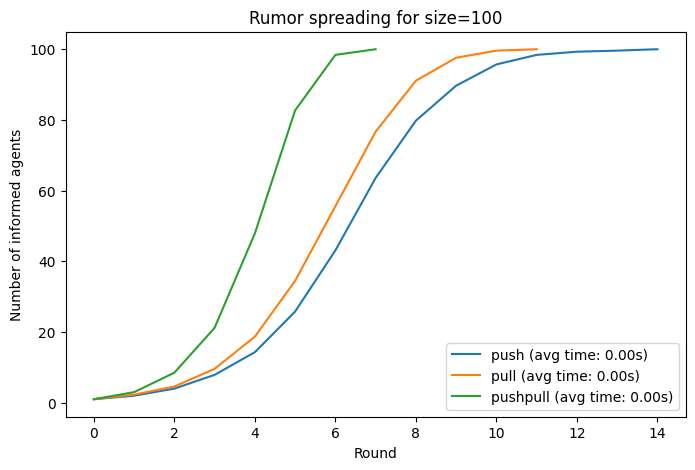

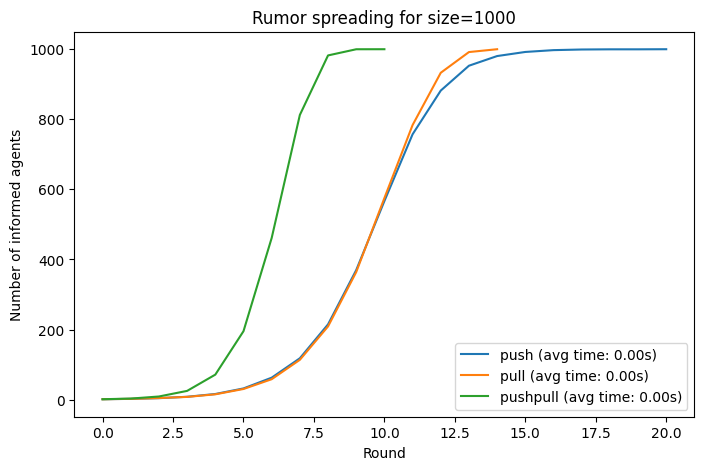

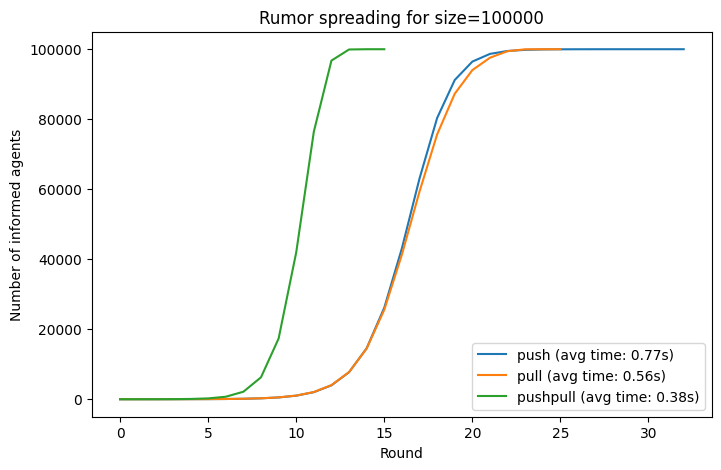

In [40]:


# Parameters
sizes = [100, 1000, 100000]
protocols = ["push", "pull", "pushpull"]
iterations = 10  # number of iterations to average

# Generate plots
for size in sizes:
    plt.figure(figsize=(8,5))
    for protocol in protocols:
        max_len = 0
        all_counts = []
        all_times = []  # list to store elapsed times
        # Run multiple iterations
        for _ in range(iterations):
            counts, _, elapsed = simulate(protocol, size)
            all_counts.append(counts)
            all_times.append(elapsed)
            max_len = max(max_len, len(counts))
        
        # Pad lists to uniform length
        all_counts_padded = []
        for counts in all_counts:
            if len(counts) < max_len:
                counts = counts + [counts[-1]] * (max_len - len(counts))
            all_counts_padded.append(counts)
        
        # Compute mean number of informed agents
        mean_counts = np.mean(all_counts_padded, axis=0)
        # Compute mean time for this protocol and size
        mean_time = np.mean(all_times)
        # Plot the curve with protocol label and mean time
        plt.plot(range(max_len), mean_counts, label=f"{protocol} (avg time: {mean_time:.2f}s)")

    plt.xlabel("Round")
    plt.ylabel("Number of informed agents")
    plt.title(f"Rumor spreading for size={size}")
    plt.legend()
    
    plt.show()



Simulating n=10000...
Simulating n=20000...
Simulating n=30000...
Simulating n=40000...
Simulating n=50000...
Simulating n=60000...
Simulating n=70000...
Simulating n=80000...
Simulating n=90000...
Simulating n=100000...
Simulating n=110000...
Simulating n=120000...
Simulating n=130000...
Simulating n=140000...
Simulating n=150000...
Simulating n=160000...
Simulating n=170000...
Simulating n=180000...
Simulating n=190000...
Simulating n=200000...
Simulating n=210000...
Simulating n=220000...
Simulating n=230000...
Simulating n=240000...
Simulating n=250000...
Simulating n=260000...
Simulating n=270000...
Simulating n=280000...
Simulating n=290000...
Simulating n=300000...
Simulating n=310000...
Simulating n=320000...
Simulating n=330000...
Simulating n=340000...
Simulating n=350000...
Simulating n=360000...
Simulating n=370000...
Simulating n=380000...
Simulating n=390000...
Simulating n=400000...
Simulating n=410000...
Simulating n=420000...
Simulating n=430000...
Simulating n=440000.

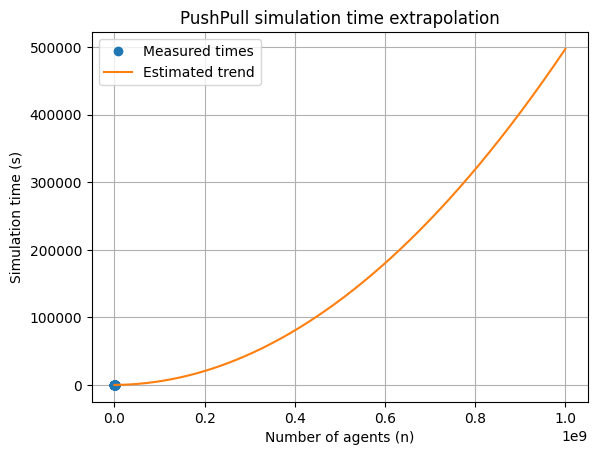

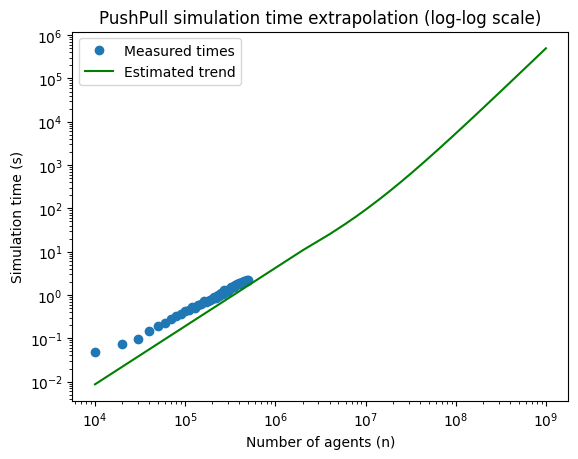

Estimated simulation time for n=1000000000: 4.97e+05 seconds
Which corresponds to approximately 5.76 days


In [44]:
step = 10000
max_n = 500000
ns = list(range(step, max_n + step, step))
protocol = "pushpull"
n_big = 1_000_000_000

total_times = []

# Run simulations
for n in ns:
    print(f"Simulating n={n}...")
    _, _, elapsed = simulate(protocol, n)
    total_times.append(elapsed)

# Fit a quadratic curve
coeffs = np.polyfit(ns, total_times, 2)
n_extrap = np.linspace(ns[0], n_big, 500)
time_estimated = np.polyval(coeffs, n_extrap)

# Plot results
plt.plot(ns, total_times, 'o', label='Measured times')
plt.plot(n_extrap, time_estimated, '-', label='Estimated trend')
plt.xlabel("Number of agents (n)")
plt.ylabel("Simulation time (s)")
plt.title("PushPull simulation time extrapolation")
plt.legend()
plt.grid(True)
plt.show()

# Plot results with logarithmic scales
plt.plot(ns, total_times, 'o', label='Measured times')
plt.plot(n_extrap, time_estimated, '-', color='green', label='Estimated trend')
plt.xlabel("Number of agents (n)")
plt.ylabel("Simulation time (s)")
plt.title("PushPull simulation time extrapolation (log-log scale)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# Calculate estimated time using the quadratic fit
time_n_big_sec = np.polyval(coeffs, n_big)

# Convert seconds to days
time_n_big_days = time_n_big_sec / (60 * 60 * 24)

print(f"Estimated simulation time for n={n_big}: {time_n_big_sec:.2e} seconds")
print(f"Which corresponds to approximately {time_n_big_days:.2f} days")


